# Read in new data files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

from typing          import Optional
from typing          import Union
from typing          import Callable

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'

from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer
from invisible_cities.io.hits_io          import hits_writer
from invisible_cities.core                import tbl_functions   as tbl
from invisible_cities.core.core_functions import in_range
from invisible_cities.cities.beersheba    import hitc_to_df_
from invisible_cities.io.hits_io          import hits_from_df
from invisible_cities.evm.nh5             import HitsTable
from invisible_cities.types.symbols       import NormStrategy
from invisible_cities.types.ic_types      import NoneType
from invisible_cities.reco.corrections    import read_maps, get_df_to_z_converter, apply_all_correction
from invisible_cities.evm.event_model     import HitCollection

from tqdm import tqdm


# Read in data to collect the events that are normal

In [2]:
RUNNUMBER = 15116

In [ ]:
n100_dir = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/{RUNNUMBER}/sophronia/trigger2/'

full_dst_norebin = []

for i in tqdm(range(1, 8)):

    print(f"LDC {i}")
    folder_path = n100_dir + 'ldc' + str(i) + '/'
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    
    full_dst_norebin.append(load_dsts([folder_path + x for x in file_names], 'DST', 'Events'))

full_dst_norebin = pd.concat(full_dst_norebin)

  0%|          | 0/7 [00:00<?, ?it/s]

LDC 1


In [ ]:
n100_dir = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/{RUNNUMBER}/sophronia_rebin/trigger_2/'

full_dst = []

for i in tqdm(range(1, 8)):

    print(f"LDC {i}")
    folder_path = n100_dir + 'ldc' + str(i) + '/'
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    
    full_dst.append(load_dsts([folder_path + x for x in file_names], 'DST', 'Events'))

full_dst = pd.concat(full_dst)

  0%|          | 0/7 [00:00<?, ?it/s]

LDC 1


 14%|█▍        | 1/7 [01:46<10:40, 106.82s/it]

LDC 2


 29%|██▊       | 2/7 [03:55<09:59, 119.81s/it]

LDC 3


 43%|████▎     | 3/7 [05:49<07:47, 116.92s/it]

LDC 4


 57%|█████▋    | 4/7 [07:43<05:47, 115.79s/it]

LDC 5


 71%|███████▏  | 5/7 [09:47<03:57, 118.91s/it]

LDC 6


 86%|████████▌ | 6/7 [11:49<01:59, 119.84s/it]

LDC 7


100%|██████████| 7/7 [13:44<00:00, 117.81s/it]


In [ ]:
display(full_dst)

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,2285152,1.742964e+09,0,0,1,28,300.0,15.193451,84.111526,1053875.0,...,422,-1043.409912,-1043.409912,9.667571,5.905803,14.673545,15.817441,1.188154,258.898359,267.431572
1,2285152,1.742964e+09,0,1,1,28,300.0,15.193451,84.111526,1053875.0,...,63,-799.462036,-799.462036,4.573496,-14.204969,16.183613,21.533473,2.291175,272.474806,240.901446
2,2285152,1.742964e+09,0,2,1,28,300.0,15.193451,84.111526,1053875.0,...,65,-765.407288,-765.407288,3.095476,-0.523603,6.992678,7.012254,1.645536,257.452764,243.449089
3,2285152,1.742964e+09,0,3,1,28,300.0,15.193451,84.111526,1053875.0,...,87,-700.321899,-700.321899,4.680112,-28.935546,22.721564,36.790424,2.475912,270.970640,241.300844
4,2285152,1.742964e+09,0,4,1,28,300.0,15.193451,84.111526,1053875.0,...,24,-650.346313,-650.346313,2.448806,-23.957886,36.508429,43.667444,2.151538,274.962980,192.420414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417489,1146984,1.742950e+09,0,13,1,18,350.0,14.895048,87.591049,1051025.0,...,25,13.259251,13.259251,0.334887,-50.313915,-30.503275,58.838251,-2.596583,285.327626,208.726692
417490,1146984,1.742950e+09,0,14,1,18,350.0,14.895048,87.591049,1051025.0,...,248,319.458893,319.458893,3.258949,117.026520,220.819256,249.912685,1.083465,184.526485,231.611476
417491,1146984,1.742950e+09,0,15,1,18,350.0,14.895048,87.591049,1051025.0,...,1799,355.466278,355.466278,15.444495,-45.666896,2.313538,45.725462,3.090975,208.250086,204.108794
417492,1146984,1.742950e+09,0,16,1,18,350.0,14.895048,87.591049,1051025.0,...,91,719.559937,719.559937,3.450844,-14.565066,17.493255,22.763021,2.265108,242.075462,285.663655


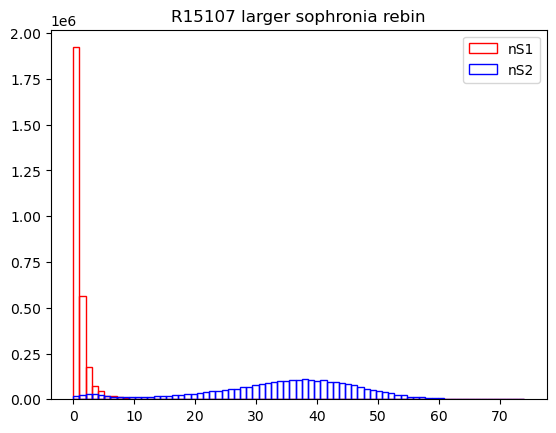

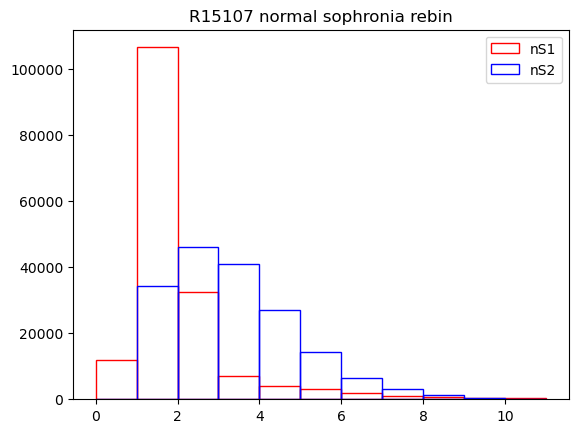

In [ ]:
# s1 s2 histo
plt.hist(full_dst.nS1, label = 'nS1', range = [0,full_dst.nS2.max()+1], bins = full_dst.nS2.max(), fill = False, edgecolor = 'r')
plt.hist(full_dst.nS2, label = 'nS2', range = [0,full_dst.nS2.max()+1], bins = full_dst.nS2.max(), fill = False, edgecolor = 'b')
plt.title(f'R{RUNNUMBER} larger sophronia rebin')
plt.legend()
plt.show()

# s1 s2 histo
plt.hist(full_dst_norebin.nS1, label = 'nS1', range = [0,full_dst_norebin.nS2.max()], bins = full_dst_norebin.nS2.max(), fill = False, edgecolor = 'r')
plt.hist(full_dst_norebin.nS2, label = 'nS2', range = [0,full_dst_norebin.nS2.max()], bins = full_dst_norebin.nS2.max(), fill = False, edgecolor = 'b')
plt.title(f'R{RUNNUMBER} normal sophronia rebin')
plt.legend()
plt.show()


In [ ]:
#remove all events between range X < DT < y
upper_lim = 1500
lower_lim = 0
relevant_dst = full_dst[full_dst.DT > lower_lim]
relevant_dst = relevant_dst[relevant_dst.DT < upper_lim]

print(f'DT cut applied\nEfficiency: {relevant_dst.event.nunique()/full_dst.event.nunique()*100:.2f}%')

DT cut applied
Efficiency: 95.14%


In [ ]:
# 1 S1, 1 S2
one_s1s2 = relevant_dst[relevant_dst.nS1 == 1]
one_s1s2 = one_s1s2[one_s1s2.nS2 == 1]

print(f'S1S2 cut applied\nRelative Efficiency: {one_s1s2.event.nunique()/relevant_dst.event.nunique()*100:.2f}%\nAbsolute Efficiency: {one_s1s2.event.nunique()/full_dst.event.nunique()*100:.2f}%')

S1S2 cut applied
Relative Efficiency: 7.77%
Absolute Efficiency: 7.40%


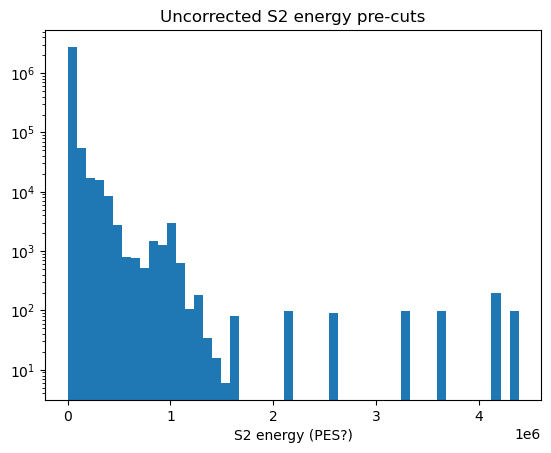

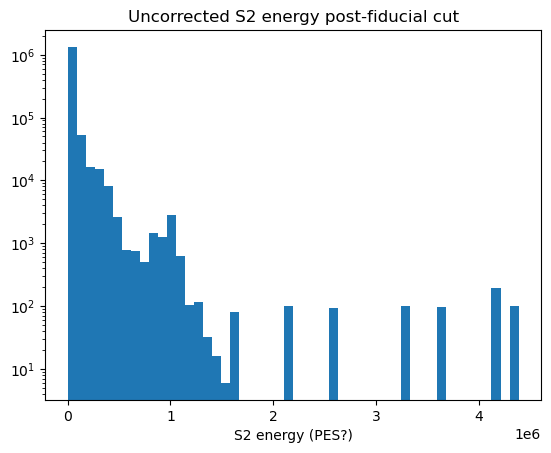

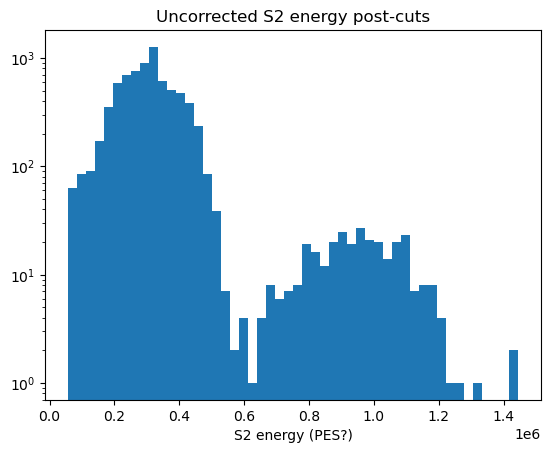

In [ ]:
plt.hist(full_dst.S2e.values, bins = 50)
plt.title('Uncorrected S2 energy pre-cuts')
plt.yscale('log')
plt.xlabel('S2 energy (PES?)')
plt.show()


plt.hist(relevant_dst.S2e.values, bins = 50)
plt.title('Uncorrected S2 energy post-fiducial cut')
plt.yscale('log')
plt.xlabel('S2 energy (PES?)')
plt.show()

plt.hist(one_s1s2.S2e.values, bins = 50)
plt.title('Uncorrected S2 energy post-cuts')
plt.yscale('log')
plt.xlabel('S2 energy (PES?)')
plt.show()

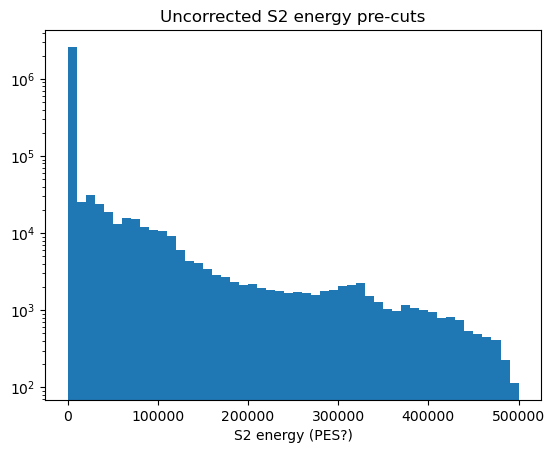

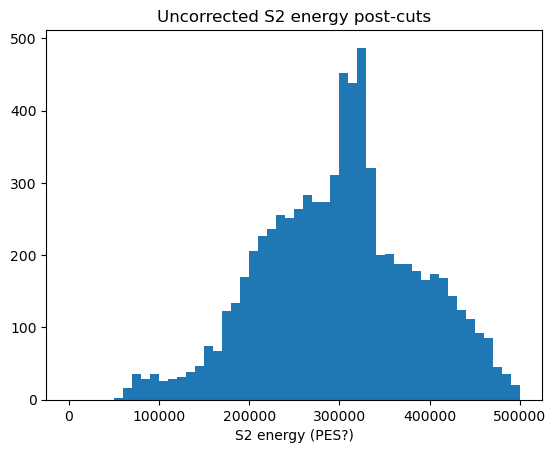

In [ ]:
plt.hist(full_dst.S2e.values, bins = 50, range = [0, 5e5])
plt.title('Uncorrected S2 energy pre-cuts')
plt.yscale('log')
plt.xlabel('S2 energy (PES?)')
plt.show()

plt.hist(one_s1s2.S2e.values, bins = 50, range = [0, 5e5])
plt.title('Uncorrected S2 energy post-cuts')
#plt.yscale('log')
plt.xlabel('S2 energy (PES?)')
plt.show()

In [ ]:
display(one_s1s2)

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
116,2177996,1.742963e+09,0,0,1,1,650.0,49.175755,262.064423,401525.0,...,2861,1006.966309,1006.966309,28.772783,188.054447,-13.950819,188.571208,-0.074049,246.053321,180.806802
190,1198290,1.742951e+09,0,0,1,1,550.0,27.797928,148.795761,1032125.0,...,2855,375.357147,375.357147,37.927375,125.760195,139.807328,188.047110,0.838244,232.851360,236.399323
395,1127289,1.742950e+09,0,0,1,1,575.0,72.781548,406.735565,585675.0,...,3515,821.810303,821.810303,96.534125,147.268254,84.815097,169.945695,0.522527,257.483846,213.228622
738,5959,1.742935e+09,0,0,1,1,350.0,37.265316,208.325470,920825.0,...,2659,490.657654,490.657654,19.305871,-101.424776,91.991796,136.928724,2.404926,198.446188,187.914956
742,716942,1.742944e+09,0,0,1,1,325.0,39.857712,227.969711,1214325.0,...,3075,192.167755,192.167755,23.653041,163.044519,20.110596,164.280100,0.122724,224.456787,173.435734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415551,2208863,1.742964e+09,0,0,1,1,325.0,43.038883,243.493256,808175.0,...,2773,604.315552,604.315552,17.572646,90.553383,125.720215,154.937044,0.946591,188.723847,197.058761
415633,2209010,1.742964e+09,0,0,1,1,875.0,44.134792,239.043304,608325.0,...,2818,803.150269,803.150269,24.521580,150.915993,49.303183,158.765364,0.315762,216.593622,175.953843
416029,1672845,1.742957e+09,0,0,1,1,350.0,48.845734,266.919250,873650.0,...,2843,537.839294,537.839294,18.481344,122.934961,140.131577,186.413153,0.850675,201.651855,204.028662
416193,353604,1.742940e+09,0,0,1,1,325.0,76.412697,431.589050,673125.0,...,3184,743.367432,743.367432,24.128287,-125.768389,-103.557364,162.916590,-2.452747,201.024309,195.058228


In [ ]:
one_s1s2.to_hdf(f'../files/DST_rebin_{RUNNUMBER}_passing.h5', key = 'DST/Events')

In [ ]:
# check
check = pd.read_hdf(f'files/DST_rebin_{RUNNUMBER}_passing.h5')
display(check)
events_of_interest = check.event.unique()

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
116,2177996,1.742963e+09,0,0,1,1,650.0,49.175755,262.064423,401525.0,...,2861,1006.966309,1006.966309,28.772783,188.054447,-13.950819,188.571208,-0.074049,246.053321,180.806802
190,1198290,1.742951e+09,0,0,1,1,550.0,27.797928,148.795761,1032125.0,...,2855,375.357147,375.357147,37.927375,125.760195,139.807328,188.047110,0.838244,232.851360,236.399323
395,1127289,1.742950e+09,0,0,1,1,575.0,72.781548,406.735565,585675.0,...,3515,821.810303,821.810303,96.534125,147.268254,84.815097,169.945695,0.522527,257.483846,213.228622
738,5959,1.742935e+09,0,0,1,1,350.0,37.265316,208.325470,920825.0,...,2659,490.657654,490.657654,19.305871,-101.424776,91.991796,136.928724,2.404926,198.446188,187.914956
742,716942,1.742944e+09,0,0,1,1,325.0,39.857712,227.969711,1214325.0,...,3075,192.167755,192.167755,23.653041,163.044519,20.110596,164.280100,0.122724,224.456787,173.435734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415551,2208863,1.742964e+09,0,0,1,1,325.0,43.038883,243.493256,808175.0,...,2773,604.315552,604.315552,17.572646,90.553383,125.720215,154.937044,0.946591,188.723847,197.058761
415633,2209010,1.742964e+09,0,0,1,1,875.0,44.134792,239.043304,608325.0,...,2818,803.150269,803.150269,24.521580,150.915993,49.303183,158.765364,0.315762,216.593622,175.953843
416029,1672845,1.742957e+09,0,0,1,1,350.0,48.845734,266.919250,873650.0,...,2843,537.839294,537.839294,18.481344,122.934961,140.131577,186.413153,0.850675,201.651855,204.028662
416193,353604,1.742940e+09,0,0,1,1,325.0,76.412697,431.589050,673125.0,...,3184,743.367432,743.367432,24.128287,-125.768389,-103.557364,162.916590,-2.452747,201.024309,195.058228


# Correct the sophronia hits of interest based on selection
selection found from DSTs in `files/DST_15107_passing.h5`

In [ ]:
n100_dir = f'/gluster/data/next/files/TOPOLOGY_John/N100_data/{RUNNUMBER}/sophronia/trigger_2/'

full_dst = []

for i in tqdm(range(1, 8)):

    print(f"LDC {i}")
    folder_path = n100_dir + 'ldc' + str(i) + '/'
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    
    dst = load_dsts([folder_path + x for x in file_names], 'RECO', 'Events')
    dst = dst[dst.event.isin(events_of_interest)]
    full_dst.append(dst)

full_dst = pd.concat(full_dst)

  0%|          | 0/7 [00:00<?, ?it/s]

LDC 1


 14%|█▍        | 1/7 [02:37<15:43, 157.29s/it]

LDC 2


 29%|██▊       | 2/7 [05:19<13:20, 160.13s/it]

LDC 3


 43%|████▎     | 3/7 [07:44<10:13, 153.38s/it]

LDC 4


 57%|█████▋    | 4/7 [10:12<07:33, 151.04s/it]

LDC 5


 71%|███████▏  | 5/7 [12:47<05:05, 152.53s/it]

LDC 6


 86%|████████▌ | 6/7 [15:07<02:28, 148.28s/it]

LDC 7


100%|██████████| 7/7 [17:45<00:00, 152.25s/it]


In [ ]:
#display(full_dst)
#full_dst.to_hdf('files/RECO_15107_passing.h5', key = 'RECO/Events')
#full_dst.to_hdf('files/15107_rebin_passing.h5', key = 'RECO/Events')
one_s1s2.to_hdf(f'files/{RUNNUMBER}_rebin_passing.h5', key = 'DST/Events')

In [ ]:
display(pd.read_hdf('files/15107_rebin_passing.h5', key = 'DST/Events'))
r = pd.read_hdf('files/15107_rebin_passing.h5', key = 'RECO/Events')
display(r)

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
116,2177996,1.742963e+09,0,0,1,1,650.0,49.175755,262.064423,401525.0,...,2861,1006.966309,1006.966309,28.772783,188.054447,-13.950819,188.571208,-0.074049,246.053321,180.806802
190,1198290,1.742951e+09,0,0,1,1,550.0,27.797928,148.795761,1032125.0,...,2855,375.357147,375.357147,37.927375,125.760195,139.807328,188.047110,0.838244,232.851360,236.399323
395,1127289,1.742950e+09,0,0,1,1,575.0,72.781548,406.735565,585675.0,...,3515,821.810303,821.810303,96.534125,147.268254,84.815097,169.945695,0.522527,257.483846,213.228622
738,5959,1.742935e+09,0,0,1,1,350.0,37.265316,208.325470,920825.0,...,2659,490.657654,490.657654,19.305871,-101.424776,91.991796,136.928724,2.404926,198.446188,187.914956
742,716942,1.742944e+09,0,0,1,1,325.0,39.857712,227.969711,1214325.0,...,3075,192.167755,192.167755,23.653041,163.044519,20.110596,164.280100,0.122724,224.456787,173.435734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415551,2208863,1.742964e+09,0,0,1,1,325.0,43.038883,243.493256,808175.0,...,2773,604.315552,604.315552,17.572646,90.553383,125.720215,154.937044,0.946591,188.723847,197.058761
415633,2209010,1.742964e+09,0,0,1,1,875.0,44.134792,239.043304,608325.0,...,2818,803.150269,803.150269,24.521580,150.915993,49.303183,158.765364,0.315762,216.593622,175.953843
416029,1672845,1.742957e+09,0,0,1,1,350.0,48.845734,266.919250,873650.0,...,2843,537.839294,537.839294,18.481344,122.934961,140.131577,186.413153,0.850675,201.651855,204.028662
416193,353604,1.742940e+09,0,0,1,1,325.0,76.412697,431.589050,673125.0,...,3184,743.367432,743.367432,24.128287,-125.768389,-103.557364,162.916590,-2.452747,201.024309,195.058228


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
9792,2177996,1.742963e+09,0,188.054448,-13.950820,1,-467.075,168.675,0.0,0.0,965.757750,7.326095,0.051972,-1.0,NaN,-1,-1.0
9793,2177996,1.742963e+09,0,188.054448,-13.950820,1,-359.225,337.725,0.0,0.0,965.757750,5.109385,0.036246,-1.0,NaN,-1,-1.0
9794,2177996,1.742963e+09,0,188.054448,-13.950820,1,73.175,-448.825,0.0,0.0,965.757750,8.430570,0.059807,-1.0,2.007027e-07,-1,-1.0
9795,2177996,1.742963e+09,0,188.054448,-13.950820,1,490.025,-1.375,0.0,0.0,965.757750,5.176532,0.036723,-1.0,NaN,-1,-1.0
9796,2177996,1.742963e+09,0,188.054448,-13.950820,1,427.825,184.225,0.0,0.0,965.757750,5.559620,0.039440,-1.0,1.361872e-07,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30568968,967777,1.742948e+09,0,40.029658,-169.915785,1,-126.975,-309.875,0.0,0.0,609.824750,5.649685,6.021073,-1.0,1.736025e-05,-1,-1.0
30568969,967777,1.742948e+09,0,40.029658,-169.915785,1,-34.675,-263.225,0.0,0.0,609.824750,6.475501,6.901175,-1.0,1.939717e-05,-1,-1.0
30568970,967777,1.742948e+09,0,40.029658,-169.915785,1,42.075,430.525,0.0,0.0,609.824750,6.036242,6.433040,-1.0,1.976668e-05,-1,-1.0
30568971,967777,1.742948e+09,0,40.029658,-169.915785,1,396.725,168.675,0.0,0.0,609.824750,5.916093,6.304994,-1.0,1.977574e-05,-1,-1.0


# Correct energy
Taking the hits corrector explicitly from IC

In [ ]:
def hits_corrector( filename   : str
                  , apply_temp : bool
                  , norm_strat : NormStrategy
                  , norm_value : Optional[Union[float, NoneType]] = None
                  ) -> Callable:
    """
    Applies energy correction map and converts drift time to z.

    Parameters
    ----------
    map_fname  : string (filepath)
        filename of the map
    apply_temp : bool
        whether to apply temporal corrections
        must be set to False if no temporal correction dataframe exists in map file

    Returns
    ----------
    A function that takes a HitCollection as input and returns
    the same object with modified Ec and Z fields.
    """

    if ( ((norm_strat is not NormStrategy.custom)  ^  (norm_value is None)) or
          (norm_strat is     NormStrategy.custom) and (norm_value<= 0)):
        raise ValueError(
            "`NormStrategy.custom` requires `norm_value` to be greater than 0. "
            "For all other `NormStrategy` options, `norm_value` must not be provided."
        )

    maps      = read_maps(os.path.expandvars(filename))
    get_coef  = apply_all_correction( maps
                                    , apply_temp = apply_temp
                                    , norm_strat = norm_strat
                                    , norm_value = norm_value)
    time_to_Z = get_df_to_z_converter(maps) if maps.t_evol is not None else identity

    def correct(hitc : HitCollection) -> HitCollection:
        for hit in hitc.hits:
            corr    = get_coef([hit.X], [hit.Y], [hit.Z], hitc.time)[0]
            hit.Ec  = hit.E * corr
            hit.xyz = (hit.X, hit.Y, time_to_Z(hit.Z)) # ugly, but temporary
        return hitc

    return correct

In [ ]:

corrector = hits_corrector('/gluster/data/next/files/TOPOLOGY_John/LPR/LightTables/map_4bar_15063.h5',
                           True,
                           NormStrategy.kr)

corrected_RECO = []

for i, df in tqdm(r.groupby('event')):
    #print(i)
    #display(df)
    hitc = hits_from_df(df)
    key = list(hitc.keys())[0]
    correct_hitc = corrector(hitc[key])
    corrected_RECO.append(hitc_to_df_(correct_hitc))
    
corrected_RECO = pd.concat(corrected_RECO)
'''
maps      = read_maps(os.path.expandvars('/gluster/data/next/files/TOPOLOGY_John/LPR/LightTables/map_4bar_15063.h5'))
get_coef  = apply_all_correction( maps
                                , apply_temp = True
                                , norm_strat = NormStrategy.kr)



# ^^^ This shit was too slow, so have to rewrite the logic to apply to a full df
#coefs = get_coef(r.)
'''

In [ ]:
for hit in hitc[list(hitc.keys())[0]].hits:
    print(type(hit.X))
    print([hit.X])
    break
print([[x] for x in r.X.values[1:5]])

<class 'numpy.float64'>
[-142.525]
[[-265.925], [181.025], [-281.475], [212.125]]


In [ ]:
display(r)
x_vals = r.X.values
y_vals = r.Y.values
z_vals = r.Z.values
t_vals = r.time.values
print(x_vals, y_vals, z_vals, t_vals)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
9792,2177996,1.742963e+09,0,188.054448,-13.950820,1,-467.075,168.675,0.0,0.0,965.757750,7.326095,0.051972,-1.0,NaN,-1,-1.0
9793,2177996,1.742963e+09,0,188.054448,-13.950820,1,-359.225,337.725,0.0,0.0,965.757750,5.109385,0.036246,-1.0,NaN,-1,-1.0
9794,2177996,1.742963e+09,0,188.054448,-13.950820,1,73.175,-448.825,0.0,0.0,965.757750,8.430570,0.059807,-1.0,2.007027e-07,-1,-1.0
9795,2177996,1.742963e+09,0,188.054448,-13.950820,1,490.025,-1.375,0.0,0.0,965.757750,5.176532,0.036723,-1.0,NaN,-1,-1.0
9796,2177996,1.742963e+09,0,188.054448,-13.950820,1,427.825,184.225,0.0,0.0,965.757750,5.559620,0.039440,-1.0,1.361872e-07,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30568968,967777,1.742948e+09,0,40.029658,-169.915785,1,-126.975,-309.875,0.0,0.0,609.824750,5.649685,6.021073,-1.0,1.736025e-05,-1,-1.0
30568969,967777,1.742948e+09,0,40.029658,-169.915785,1,-34.675,-263.225,0.0,0.0,609.824750,6.475501,6.901175,-1.0,1.939717e-05,-1,-1.0
30568970,967777,1.742948e+09,0,40.029658,-169.915785,1,42.075,430.525,0.0,0.0,609.824750,6.036242,6.433040,-1.0,1.976668e-05,-1,-1.0
30568971,967777,1.742948e+09,0,40.029658,-169.915785,1,396.725,168.675,0.0,0.0,609.824750,5.916093,6.304994,-1.0,1.977574e-05,-1,-1.0


[-467.075 -359.225   73.175 ...   42.075  396.725  443.375] [ 168.675  337.725 -448.825 ...  430.525  168.675 -248.175] [965.75775  965.75775  965.75775  ... 609.82475  609.82475  614.367625] [1.74296312e+09 1.74296312e+09 1.74296312e+09 ... 1.74294762e+09
 1.74294762e+09 1.74294762e+09]


# Correct E

In [ ]:
maps       = read_maps(os.path.expandvars('/gluster/data/next/files/TOPOLOGY_John/LPR/LightTables/map_4bar_15063.h5'))
apply_temp = True
norm_strat = NormStrategy.kr

get_coef  = apply_all_correction( maps
                                , apply_temp = apply_temp
                                , norm_strat = norm_strat
                                , norm_value = None)

time_to_Z = get_df_to_z_converter(maps) if maps.t_evol is not None else identity

In [ ]:
get_all_coefs = get_coef(x_vals, y_vals, z_vals, t_vals)


In [ ]:
display(get_all_coefs)
print(len(get_all_coefs))
print(len(x_vals))

array([           nan,            nan, 6.33465362e-06, ...,
       5.81853349e-06, 5.62150945e-06,            nan])

17488012
17488012


In [ ]:
e_corr = r.E.values * get_all_coefs
print(e_corr)
z_corr = time_to_Z(z_vals)
print(z_corr)

[           nan            nan 3.78855255e-07 ... 3.74308605e-05
 3.54435808e-05            nan]
[2100.99596692 2100.99596692 2100.99596692 ... 1326.66741766 1326.66741766
 1336.5503951 ]


In [ ]:
r['Ec'] = e_corr

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
9792,2177996,1.742963e+09,0,188.054448,-13.950820,1,-467.075,168.675,0.0,0.0,965.757750,7.326095,0.051972,-1.0,NaN,-1,-1.0
9793,2177996,1.742963e+09,0,188.054448,-13.950820,1,-359.225,337.725,0.0,0.0,965.757750,5.109385,0.036246,-1.0,NaN,-1,-1.0
9794,2177996,1.742963e+09,0,188.054448,-13.950820,1,73.175,-448.825,0.0,0.0,965.757750,8.430570,0.059807,-1.0,3.788553e-07,-1,-1.0
9795,2177996,1.742963e+09,0,188.054448,-13.950820,1,490.025,-1.375,0.0,0.0,965.757750,5.176532,0.036723,-1.0,NaN,-1,-1.0
9796,2177996,1.742963e+09,0,188.054448,-13.950820,1,427.825,184.225,0.0,0.0,965.757750,5.559620,0.039440,-1.0,2.413781e-07,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30568968,967777,1.742948e+09,0,40.029658,-169.915785,1,-126.975,-309.875,0.0,0.0,609.824750,5.649685,6.021073,-1.0,3.185212e-05,-1,-1.0
30568969,967777,1.742948e+09,0,40.029658,-169.915785,1,-34.675,-263.225,0.0,0.0,609.824750,6.475501,6.901175,-1.0,3.496719e-05,-1,-1.0
30568970,967777,1.742948e+09,0,40.029658,-169.915785,1,42.075,430.525,0.0,0.0,609.824750,6.036242,6.433040,-1.0,3.743086e-05,-1,-1.0
30568971,967777,1.742948e+09,0,40.029658,-169.915785,1,396.725,168.675,0.0,0.0,609.824750,5.916093,6.304994,-1.0,3.544358e-05,-1,-1.0


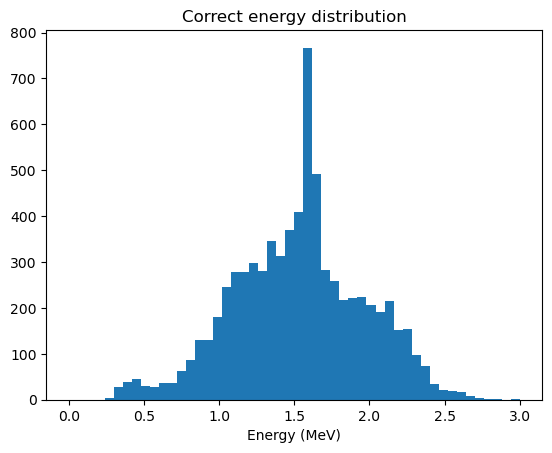

In [ ]:
display(r)
plt.hist(r.groupby('event').Ec.sum(), bins = 50, range = [0, 3])
plt.xlabel('Energy (MeV)')
plt.title('Correct energy distribution')
plt.show()
#display(pd.read_hdf('/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/sophronia_cor/trigger2/ldc1/run_15107_0001_ldc1_trg2.v2.3.1.20250312-1-gc1f0fe5.HE.sophronia.h5', 'DST/Events'))

# Lets try and read everything into one file to be used

In [ ]:
r.to_hdf('files/15107_corrected.h5', key = 'RECO/Events', mode = 'a')

In [ ]:
dsts = pd.read_hdf('files/15107_passing.h5', key = 'DST/Events')
display(dsts)

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
2,275,1.742935e+09,0,0,1,1,375.0,20.105528,130.680893,1217525.0,...,2539,185.960632,185.960632,18.371055,15.761644,-65.178615,67.057299,-1.333529,190.955556,208.454665
14,590,1.742935e+09,0,0,1,1,400.0,41.841473,240.074432,1139325.0,...,2969,266.157379,266.157379,29.010471,170.053074,19.509000,171.168482,0.114224,217.766683,168.386432
15,597,1.742935e+09,0,0,1,1,650.0,16.592751,97.683167,493475.0,...,2261,919.024780,919.024780,9.251109,75.948209,52.021293,92.056208,0.600559,214.760246,197.605371
20,1556,1.742935e+09,0,0,1,1,350.0,17.792589,102.266724,530275.0,...,2102,877.213196,877.213196,8.832326,110.182593,3.345906,110.233384,0.030358,237.921637,199.830332
25,1794,1.742935e+09,0,0,1,1,275.0,21.349106,106.103920,877900.0,...,2550,531.588501,531.588501,8.046095,108.494903,87.064883,139.109446,0.676251,240.576917,220.669800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,658454,1.742944e+09,0,0,1,1,375.0,10.825253,69.822937,1202675.0,...,2851,205.808258,205.808258,9.201199,15.608674,98.721551,99.947863,1.413986,224.630671,251.603989
25152,658699,1.742944e+09,0,0,1,1,575.0,16.538542,87.122505,839450.0,...,2870,567.041748,567.041748,12.670540,40.841408,-8.578211,41.732557,-0.207028,226.215802,217.065314
25153,658923,1.742944e+09,0,0,1,1,625.0,15.709264,91.425804,1274300.0,...,2163,129.195633,129.195633,18.046918,86.402601,-24.296199,89.753634,-0.274119,203.298461,188.980867
25160,1074513,1.742949e+09,0,0,1,1,350.0,19.289764,105.112312,792425.0,...,2470,616.065002,616.065002,13.975123,-3.418172,-1.705237,3.819913,-2.678846,203.424014,201.055704


In [ ]:
dsts.to_hdf('files/15107_corrected.h5', key = 'DST/Events', mode = 'a')

In [ ]:
print(r.event.nunique())
print(dsts.event.nunique())


24826
24826


In [ ]:
!ptdump files/15107_corrected.h5

^C


In [ ]:
q = pd.read_hdf('files/15107_corrected.h5', key = 'RECO/Events')
display(q)

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
1483,275,1.742935e+09,3,15.761644,-65.178616,1,474.475,-32.475,0.0,0.0,159.434125,5.256973,-2.562765,-1.0,-0.000016,-1,-1.0
1484,275,1.742935e+09,3,15.761644,-65.178616,1,-265.925,399.925,0.0,0.0,161.691000,7.539444,-3.154945,-1.0,NaN,-1,-1.0
1485,275,1.742935e+09,3,15.761644,-65.178616,1,181.025,414.975,0.0,0.0,161.691000,6.790727,-2.841638,-1.0,-0.000018,-1,-1.0
1486,275,1.742935e+09,3,15.761644,-65.178616,1,-281.475,-279.275,0.0,0.0,165.937000,5.034613,17.929243,-1.0,0.000097,-1,-1.0
1487,275,1.742935e+09,3,15.761644,-65.178616,1,212.125,-325.425,0.0,0.0,167.834250,5.043945,159.742005,-1.0,0.000833,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14175231,1074912,1.742949e+09,0,-107.260682,-11.486680,1,196.575,214.825,0.0,0.0,1144.738500,5.329231,5.760224,-1.0,0.000029,-1,-1.0
14175232,1074912,1.742949e+09,0,-107.260682,-11.486680,1,-389.325,214.325,0.0,0.0,1147.229500,8.552230,-6.227441,-1.0,-0.000040,-1,-1.0
14175233,1074912,1.742949e+09,0,-107.260682,-11.486680,1,-65.775,-356.525,0.0,0.0,1147.229500,6.788672,-4.943279,-1.0,-0.000026,-1,-1.0
14175234,1074912,1.742949e+09,0,-107.260682,-11.486680,1,88.725,492.725,0.0,0.0,1147.229500,6.301342,-4.588421,-1.0,NaN,-1,-1.0


In [ ]:
n100_dir = '/gluster/data/next/files/TOPOLOGY_John/N100_data/15107/sophronia/trigger2/'

evt_dst  = []
run_info = []

for i in tqdm(range(1, 8)):

    print(f"LDC {i}")
    folder_path = n100_dir + 'ldc' + str(i) + '/'
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
    
    dst = load_dsts([folder_path + x for x in file_names], 'Run', 'events')
    dst = dst[dst.evt_number.isin(events_of_interest)]
    evt_dst.append(dst)

evt_dst = pd.concat(evt_dst)

  0%|          | 0/7 [00:00<?, ?it/s]

LDC 1


 14%|█▍        | 1/7 [00:26<02:39, 26.56s/it]

LDC 2


 29%|██▊       | 2/7 [01:05<02:48, 33.67s/it]

LDC 3


 43%|████▎     | 3/7 [01:38<02:13, 33.27s/it]

LDC 4


 57%|█████▋    | 4/7 [02:18<01:48, 36.14s/it]

LDC 5


 71%|███████▏  | 5/7 [03:12<01:25, 42.73s/it]

LDC 6


 86%|████████▌ | 6/7 [04:06<00:46, 46.56s/it]

LDC 7


100%|██████████| 7/7 [04:41<00:00, 40.19s/it]


In [ ]:
display(evt_dst)

,evt_number,timestamp
1,275,1742935251202
4,590,1742935255246
5,597,1742935255345
8,1556,1742935267472
11,1794,1742935270569
...,...,...
9871,658454,1742943661813
9873,658699,1742943664872
9874,658923,1742943667847
9876,1074513,1742948988242


### play with this set to get it to the right size

In [ ]:
dst = load_dsts([folder_path + x for x in file_names], 'Run', 'runInfo')


In [ ]:
#dst = pd.concat([dst, dst])
dst = dst.head(24826)
display(dst)
display(q)
display(evt_dst)

,run_number
0,15107
1,15107
2,15107
3,15107
4,15107
...,...
5055,15107
5056,15107
5057,15107
5058,15107


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
1483,275,1.742935e+09,3,15.761644,-65.178616,1,474.475,-32.475,0.0,0.0,159.434125,5.256973,-2.562765,-1.0,-0.000016,-1,-1.0
1484,275,1.742935e+09,3,15.761644,-65.178616,1,-265.925,399.925,0.0,0.0,161.691000,7.539444,-3.154945,-1.0,NaN,-1,-1.0
1485,275,1.742935e+09,3,15.761644,-65.178616,1,181.025,414.975,0.0,0.0,161.691000,6.790727,-2.841638,-1.0,-0.000018,-1,-1.0
1486,275,1.742935e+09,3,15.761644,-65.178616,1,-281.475,-279.275,0.0,0.0,165.937000,5.034613,17.929243,-1.0,0.000097,-1,-1.0
1487,275,1.742935e+09,3,15.761644,-65.178616,1,212.125,-325.425,0.0,0.0,167.834250,5.043945,159.742005,-1.0,0.000833,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14175231,1074912,1.742949e+09,0,-107.260682,-11.486680,1,196.575,214.825,0.0,0.0,1144.738500,5.329231,5.760224,-1.0,0.000029,-1,-1.0
14175232,1074912,1.742949e+09,0,-107.260682,-11.486680,1,-389.325,214.325,0.0,0.0,1147.229500,8.552230,-6.227441,-1.0,-0.000040,-1,-1.0
14175233,1074912,1.742949e+09,0,-107.260682,-11.486680,1,-65.775,-356.525,0.0,0.0,1147.229500,6.788672,-4.943279,-1.0,-0.000026,-1,-1.0
14175234,1074912,1.742949e+09,0,-107.260682,-11.486680,1,88.725,492.725,0.0,0.0,1147.229500,6.301342,-4.588421,-1.0,NaN,-1,-1.0


,evt_number,timestamp
1,275,1742935251202
4,590,1742935255246
5,597,1742935255345
8,1556,1742935267472
11,1794,1742935270569
...,...,...
9871,658454,1742943661813
9873,658699,1742943664872
9874,658923,1742943667847
9876,1074513,1742948988242


In [ ]:
file = 'files/15107_formatted.h5'
compression = 'ZLIB4'
with tb.open_file(file, "w", filters = tbl.filters(compression)) as h5out:

    df_writer(h5out,   q, "RECO", "Events" , compression="ZLIB4")
    df_writer(h5out, dst, "Run" , "runInfo" , compression="ZLIB4")
    df_writer(h5out,   evt_dst, "Run" , "events", compression="ZLIB4")

In [ ]:
display(dsts)

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
2,275,1.742935e+09,0,0,1,1,375.0,20.105528,130.680893,1217525.0,...,2539,185.960632,185.960632,18.371055,15.761644,-65.178615,67.057299,-1.333529,190.955556,208.454665
14,590,1.742935e+09,0,0,1,1,400.0,41.841473,240.074432,1139325.0,...,2969,266.157379,266.157379,29.010471,170.053074,19.509000,171.168482,0.114224,217.766683,168.386432
15,597,1.742935e+09,0,0,1,1,650.0,16.592751,97.683167,493475.0,...,2261,919.024780,919.024780,9.251109,75.948209,52.021293,92.056208,0.600559,214.760246,197.605371
20,1556,1.742935e+09,0,0,1,1,350.0,17.792589,102.266724,530275.0,...,2102,877.213196,877.213196,8.832326,110.182593,3.345906,110.233384,0.030358,237.921637,199.830332
25,1794,1.742935e+09,0,0,1,1,275.0,21.349106,106.103920,877900.0,...,2550,531.588501,531.588501,8.046095,108.494903,87.064883,139.109446,0.676251,240.576917,220.669800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,658454,1.742944e+09,0,0,1,1,375.0,10.825253,69.822937,1202675.0,...,2851,205.808258,205.808258,9.201199,15.608674,98.721551,99.947863,1.413986,224.630671,251.603989
25152,658699,1.742944e+09,0,0,1,1,575.0,16.538542,87.122505,839450.0,...,2870,567.041748,567.041748,12.670540,40.841408,-8.578211,41.732557,-0.207028,226.215802,217.065314
25153,658923,1.742944e+09,0,0,1,1,625.0,15.709264,91.425804,1274300.0,...,2163,129.195633,129.195633,18.046918,86.402601,-24.296199,89.753634,-0.274119,203.298461,188.980867
25160,1074513,1.742949e+09,0,0,1,1,350.0,19.289764,105.112312,792425.0,...,2470,616.065002,616.065002,13.975123,-3.418172,-1.705237,3.819913,-2.678846,203.424014,201.055704


In [ ]:
file = 'files/15107_formatted.h5'
compression = 'ZLIB4'
with tb.open_file(file, "a", filters = tbl.filters(compression)) as h5out:

    df_writer(h5out,   dsts, "DST", "Events" , compression="ZLIB4")

In [ ]:
dst = pd.read_hdf('files/15107_formatted.h5', key = 'DST/Events')
display(dst)
print(dst.event.nunique())

,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,275,1.742935e+09,0,0,1,1,375.0,20.105528,130.680893,1217525.0,...,2539,185.960632,185.960632,18.371055,15.761644,-65.178615,67.057299,-1.333529,190.955556,208.454665
1,590,1.742935e+09,0,0,1,1,400.0,41.841473,240.074432,1139325.0,...,2969,266.157379,266.157379,29.010471,170.053074,19.509000,171.168482,0.114224,217.766683,168.386432
2,597,1.742935e+09,0,0,1,1,650.0,16.592751,97.683167,493475.0,...,2261,919.024780,919.024780,9.251109,75.948209,52.021293,92.056208,0.600559,214.760246,197.605371
3,1556,1.742935e+09,0,0,1,1,350.0,17.792589,102.266724,530275.0,...,2102,877.213196,877.213196,8.832326,110.182593,3.345906,110.233384,0.030358,237.921637,199.830332
4,1794,1.742935e+09,0,0,1,1,275.0,21.349106,106.103920,877900.0,...,2550,531.588501,531.588501,8.046095,108.494903,87.064883,139.109446,0.676251,240.576917,220.669800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24821,658454,1.742944e+09,0,0,1,1,375.0,10.825253,69.822937,1202675.0,...,2851,205.808258,205.808258,9.201199,15.608674,98.721551,99.947863,1.413986,224.630671,251.603989
24822,658699,1.742944e+09,0,0,1,1,575.0,16.538542,87.122505,839450.0,...,2870,567.041748,567.041748,12.670540,40.841408,-8.578211,41.732557,-0.207028,226.215802,217.065314
24823,658923,1.742944e+09,0,0,1,1,625.0,15.709264,91.425804,1274300.0,...,2163,129.195633,129.195633,18.046918,86.402601,-24.296199,89.753634,-0.274119,203.298461,188.980867
24824,1074513,1.742949e+09,0,0,1,1,350.0,19.289764,105.112312,792425.0,...,2470,616.065002,616.065002,13.975123,-3.418172,-1.705237,3.819913,-2.678846,203.424014,201.055704


24826


124.13
